In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns',None)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def improt_data(lujing,code):
    data = pd.read_csv(lujing,encoding =code)
    return data

def mean(data,a):
    print('平均值',data[a].mean())
    print('方差',data[a].std())

def box_polt(a):
    zhongwei = a.median()
    mean = a.mean()
    q1 = a.quantile(0.25)
    q2 = a.quantile(0.5)
    q3 = a.quantile(0.75)
    q4 = a.quantile(1)
    iqr = q3-q1
    upper = q3 + 1.5*iqr
    print('--------------')
    print('中位:',zhongwei)
    print('平均:',mean)    
    print('--------------')
    print('50% :',q2)
    print('75% :',q3)
    print('100%:',upper)
    print('max :',q4)
    print('--------------')
    list_ = []
    list_.append(q2)
    list_.append(q3)
    list_.append(upper)
    return list_

def data_order(a,b):
#     lujing = r'C:/Users/Administrator/Datas/爱尚花语/艾尚花语指标模型/data/Ddata.csv'
#     code = 'gbk'
    data = improt_data(lujing,code)
    if b == 0:
        df_hsh_max = data[data['曝光人数'] > a]
        k = df_hsh_max
        return k
    elif a == 0:
        df_hsh_min = data[data['曝光人数'] < b  ]
        k = df_hsh_min
        return k
    else:
        df_hsh_ = data[(data['曝光人数'] >=a) & (data['曝光人数'] <= b) ]
        k = df_hsh_
        return k 
    
def linear(x,y):
    from sklearn import metrics
    import numpy as np
    from sklearn.model_selection import train_test_split
    from sklearn import linear_model
    X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=1)
    print('数据分集查看')
    print ('X训练',X_train.shape)
    print ('y训练',y_train.shape)
    print ('X测试',X_test.shape)
    print ('y测试',y_test.shape)
    print('-------------')
    linear =  linear_model.LinearRegression()
    linear.fit(X_train,y_train)
    print('线性结截距:', linear.intercept_)
    print ('回归系数',linear.coef_)
    y_pred = linear.predict(X_test)
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

def line_bg_rd(x1,y1):   
    x = x1
    y = y1
    data_min = data_order(x,y)
    baoguang = data_min['曝光人数'].values.reshape(-1,1)
    jindian = data_min['入店人数'].values.reshape(-1, 1)
    linear(baoguang,jindian)

def drop(data):
    a = data
    a.drop_duplicates(subset='商家ID',inplace = True,keep = 'last')
    print(a['商家ID'].count())


def cluster_look(data,list__):
    list_ = list__
    x = 0
    s = ['max','one','two','min']
    for i in list_:
        df = data[data['cluster'] == i]
        print( s[x] +'-分类:' + str(df['cluster'].count()))    
        x = x+1


In [3]:
lujing = r'C:\Users\Administrator\Datas\艾尚花语\艾尚月季度数据\7月份数据\Data/Mdata_kmeans.csv'
code = 'gbk'
data = improt_data(lujing,code)

In [4]:
# data.describe()

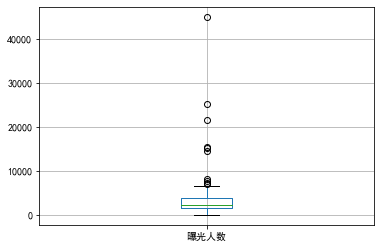

In [5]:
plt.rcParams['font.sans-serif'] = ['SimHei']  
plt.rcParams['axes.unicode_minus'] = False 
data.boxplot('曝光人数')

In [6]:
a = data['曝光人数']
list_ = box_polt(a)
q1 = list_[0]
q2 = list_[1]
q3 = list_[2]
q04 =  0
print(q1)
print(q2)
print(q3)

--------------
中位: 2325.0
平均: 3297.6230366492146
--------------
50% : 2325.0
75% : 3727.0
100%: 6893.5
max : 44869.0
--------------
2325.0
3727.0
6893.5


In [7]:
print('min')
line_bg_rd(q04,q1)
print('##################################')
print('one')
line_bg_rd(q1,q2)
print('##################################')
print('two')
line_bg_rd(q2,q3)
print('##################################')
print('max')
line_bg_rd(q3,q04)


min
数据分集查看
X训练 (71, 1)
y训练 (71, 1)
X测试 (24, 1)
y测试 (24, 1)
-------------
线性结截距: [-17.56570922]
回归系数 [[0.04734268]]
RMSE: 21.651989456408693
##################################
one
数据分集查看
X训练 (36, 1)
y训练 (36, 1)
X测试 (12, 1)
y测试 (12, 1)
-------------
线性结截距: [43.50668858]
回归系数 [[0.01389131]]
RMSE: 55.20937642490817
##################################
two
数据分集查看
X训练 (28, 1)
y训练 (28, 1)
X测试 (10, 1)
y测试 (10, 1)
-------------
线性结截距: [33.81572607]
回归系数 [[0.02813873]]
RMSE: 72.61119954943752
##################################
max
数据分集查看
X训练 (7, 1)
y训练 (7, 1)
X测试 (3, 1)
y测试 (3, 1)
-------------
线性结截距: [161.75342993]
回归系数 [[0.01174585]]
RMSE: 111.30822669084988


In [8]:
data_max = data_order(q3,q04)
data_one = data_order(q2,q3)
data_two = data_order(q1,q2)
data_min = data_order(q04,q1)

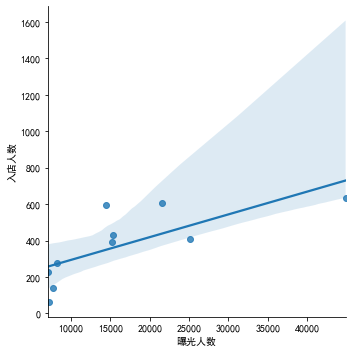

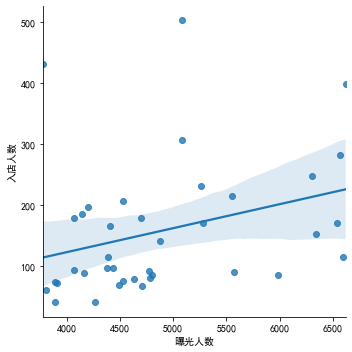

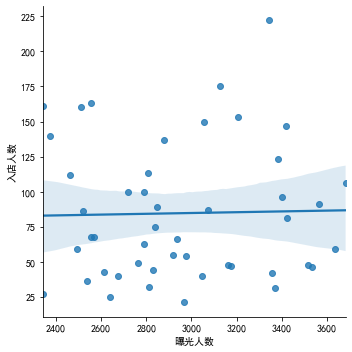

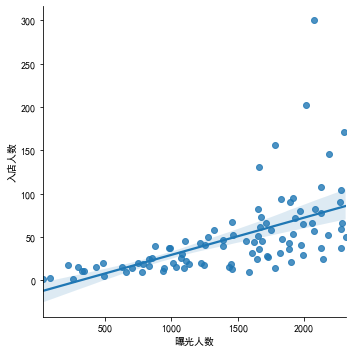

In [10]:
sns.lmplot(x="曝光人数", y="入店人数",data=data_max,fit_reg=True)
sns.lmplot(x="曝光人数", y="入店人数",data=data_one,fit_reg=True)
sns.lmplot(x="曝光人数", y="入店人数",data=data_two,fit_reg=True)
sns.lmplot(x="曝光人数", y="入店人数",data=data_min,fit_reg=True)

In [9]:
drop(data_max)
drop(data_one)
drop(data_two)
drop(data_min)

10
38
48
95


In [13]:
data_max['商家名称']

0             拾花间鲜花礼品鲜花店
1             花之坊鲜花礼品鲜花店
2          友新意鲜花坊鲜花礼品鲜花店
3              花坞鲜花礼品鲜花店
4             花无缺鲜花礼品鲜花店
5              一花一木花艺生活馆
6            繁花花坊鲜花礼品鲜花店
7           微妮初花坊鲜花礼品鲜花店
8    开封市玺花诚园艺有限公司鲜花礼品鲜花店
9             千千惠鲜花礼品鲜花店
Name: 商家名称, dtype: object

In [26]:
# data_max.count()
# print(data_min.count())
drop(data_max)

4


In [27]:
就list_t = [1,3,0,2]
cluster_look(data_max,list_t)
print('-------------')
cluster_look(data_one,list_t)
print('-------------')
cluster_look(data_two,list_t)
print('-------------')
cluster_look(data_min,list_t)

max-分类:2
one-分类:2
two-分类:0
min-分类:0
-------------
max-分类:0
one-分类:12
two-分类:14
min-分类:0
-------------
max-分类:0
one-分类:0
two-分类:29
min-分类:0
-------------
max-分类:0
one-分类:0
two-分类:17
min-分类:42


In [28]:
mean(data_max,'入店转化率')
print('-------------------')
mean(data_one,'入店转化率')
print('--------------------')
mean(data_two,'入店转化率')
print('--------------------')
mean(data_min,'入店转化率')

平均值 2.4
方差 1.1237734053921486
-------------------
平均值 2.6273076923076926
方差 1.2193262326131025
--------------------
平均值 2.6413793103448278
方差 0.9860372498684211
--------------------
平均值 5.094745762711864
方差 12.686034862702263
